<a href="https://colab.research.google.com/github/JoseRMatos/image_emotion_recognition/blob/master/emotion_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Recognition - Convolutional Neural Network

input: 48x48 pixel gray values (between 0 and 255)

target: emotion category (beween 0 and 6: anger=0, disgust=1, fear=2, happy=3, sad=4, surprise=5, neutral=6)

auxiliary information (in separate file) which can be used during training, but not as input for predicting emotions at test time: identity (-1: unknown, positive integers = ID, not all contiguous integer values). The file has one entry per training example.

## Conect with Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Import Libraries and analysis of the Data Set**

### Libraries




In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
from pathlib import Path

Using TensorFlow backend.


### Connect to google drive and Import Data-set

In [0]:
dataset_path = "/content/gdrive/My Drive/Colab Notebooks/final_project/data/fer2013.csv" 
import pandas as pd
faces = pd.read_csv(dataset_path)


Explore Data

In [0]:
faces.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
faces.shape

(35887, 3)

In [0]:
len(faces['pixels'][0].split())/(48*48)

1.0

In [0]:
x = 1
for i in range(35887):
  x = len(faces['pixels'][i].split())/(48*48)
  if x != 1:
    break    # break here
    print('Picture in row' + str(i) + 'have a differeante shape')

if x == 1:
  print('All the picture are 48x48 pixels')


All the picture are 48x48 pixels


In [0]:
for column in faces.columns:
  if column != 'pixels':
    print('Column: ' + column, faces[column].value_counts())

Column: emotion 3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64
Column: Usage Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64


### Split and reshape data for the training model

In [0]:
def load_data(dataset_path):
  
  #classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprsie', 'Neutral']  #We will be dealing with seven different types of emotions.

  data = []
  test_data = []
  test_labels = []
  labels =[]

  with open(dataset_path, 'r') as file:
      for line_no, line in enumerate(file.readlines()):
          if 0 < line_no <= 35887:
            curr_class, line, set_type = line.split(',')
            image_data = np.asarray([int(x) for x in line.split()]).reshape(48, 48)#Creating a list out of the string then converting it into a 2-Dimensional numpy array.
            image_data =image_data.astype(np.uint8)/255.0
            
            if (set_type.strip() == 'PrivateTest'):
              
              test_data.append(image_data)
              test_labels.append(curr_class)
            else:
              data.append(image_data)
              labels.append(curr_class)
      
      test_data = np.expand_dims(test_data, -1)
      test_labels = to_categorical(test_labels, num_classes = 7)
      data = np.expand_dims(data, -1)   
      labels = to_categorical(labels, num_classes = 7)
    
      return np.array(data), np.array(labels), np.array(test_data), np.array(test_labels)

In [0]:
train_data, train_labels, test_data, test_labels = load_data(dataset_path)
#train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = test_size,random_state = seed)

print("Number of images in Training set:", len(train_data))
print("Number of images in Test set:", len(test_data))

Number of images in Training set: 32298
Number of images in Test set: 3589


Setting Layers and Training Model

In [0]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

# Train the model

history = model.fit(
    train_data,
    train_labels,
    batch_size=32,
    epochs=30,
    validation_data=(test_data, test_labels),
    shuffle=True
)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 32298 samples, validate on 3589 samples
Epoch 1/30





32298/32298 [==============================] - 22s 695us/step - loss: 1.6882 - acc: 0.3258 - val_loss: 1.4843 - val_acc: 0.4322
Epoch 2/30
32298/32298 [==============================] - 20s 618us/step - loss: 1.4373 - acc: 0.4458 - val_loss: 1.3100 - val_acc: 0.5054
Epoch 3/30
32298/32298 [==============================] - 20s 615us/step - loss: 1.3137 - acc: 0.4954 - val_loss: 1.2503 - val_acc: 0.5216
Epoch 4/30
32298/32298 [==============================] - 20s 619us/step - loss: 1.2338 - acc: 0.5308 - val_loss: 1.1900 - val_acc: 0.5456
Epoch 5/30
32298/32298 [==============================] - 20s 618us/step - loss: 1.1700 - acc: 0.5570 - val_loss: 1.1752 - val_acc: 0.5522
Epoch 6/30
32298/32298 [========

Saving neural network structure and weights

In [0]:
# Save neural network structure
model_structure = model.to_json()
f = Path("/content/gdrive/My Drive/Colab Notebooks/final_project/model_structure2.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("/content/gdrive/My Drive/Colab Notebooks/final_project/model_weights2.h5")


### Graph analysis

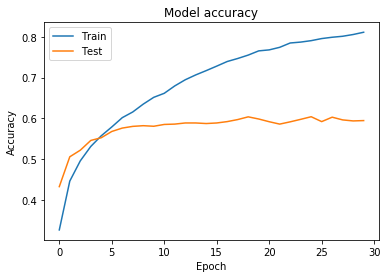

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

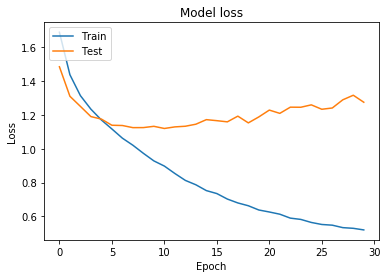

In [0]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()